In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp,LSODA
from tqdm import tqdm

figpath = r"H:\PERSONAL\PROJECTS\Programming\ACADEMICS\Int_lab2\NL_circuits\figures"

In [1]:
99.5 / 11.91

8.354324097397145

### Lorentz Circuit Simulator constants


In [27]:
# Lorenz Attractor


# Circuit parameters (resistances in Ohms, capacitances in Farads, voltages in Volts)
# FROM Msc thesis

R1 = 10e3
R2 = 100e3
R3 = 10e3
R4 = 100e3

R5 = 0.9765e3 #variable (potentiometer)
# R5 = 1e3

R6 = 5.6e3
R7 = 3.3e3
R8 = 3.6e3
R9 = 3.19e3
R10 = 100e3
R11 = 1e3
R12 = 3.3e3
R13 = 37.5e3
R14 = 3.3e3
R15 = 3.74e3
R16 = 100e3
R17 = 1e3
R18 = 1e3
R19 = 9e3

C1 = 200e-9
C2 = 200e-9
C3 = 200e-9

# Initial conditions
state_0 = [0.1, 0.1, 0.9]
t_0 = 0.0
t_f = 0.04
max_step = 0.005

def equations(t, state):
    X, Y, Z = state
    
    # Non-linear circuit equations
    dxdt = (- X - ((R4/R1) * X) + ((R4/R2) * X) + (R4/R3) * Y) / (C1 * R5)
    dydt = (- Y - ((R10/R7) *X * Z) + ((R10/R8) * X)) / (C2 * R11)
    dzdt = (- Z - ((R16/R13) * Z) + ((R16/R14) * X * Y)) / (C3 * R17)
    
    return [dxdt, dydt, dzdt]

### Solving single instance

In [7]:
# Solve the ODE system using LSODA method
sol = LSODA(equations,  t_0, state_0, t_f, vectorized=True)

# initialize the solution array
X = [sol.y[0]]
Y = [sol.y[1]]
Z = [sol.y[2]]
t = [sol.t]

print(sol.status)

while sol.status != 'finished':
    sol.step()
    t.append(sol.t)
    X.append(sol.y[0])
    Y.append(sol.y[1])
    Z.append(sol.y[2])
    

print(sol.status)

print(t[0], X[0], Y[0], Z[0])
print(t[-1], X[-1], Y[-1], Z[-1])
print(f"{len(t)} steps completed")


running
finished
0.0 0.1 0.1 0.9
0.04 0.5345788001260321 0.5301084607678256 1.191103659571193
12123 steps completed


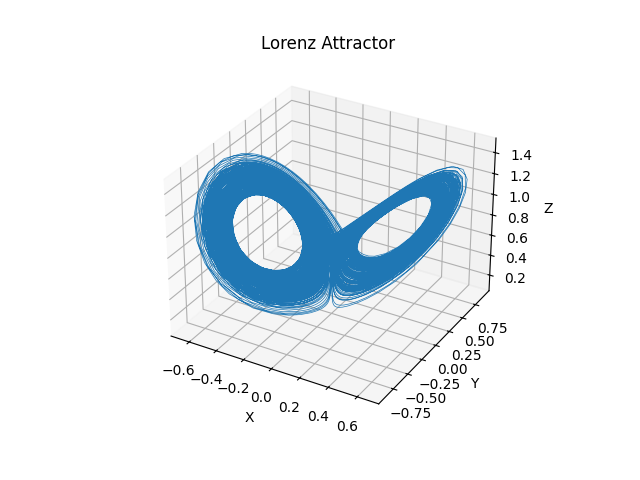

In [8]:
# for creating a responsive plot
%matplotlib widget
 
# creating figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X, Y, Z, lw=0.5,alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')
plt.show()

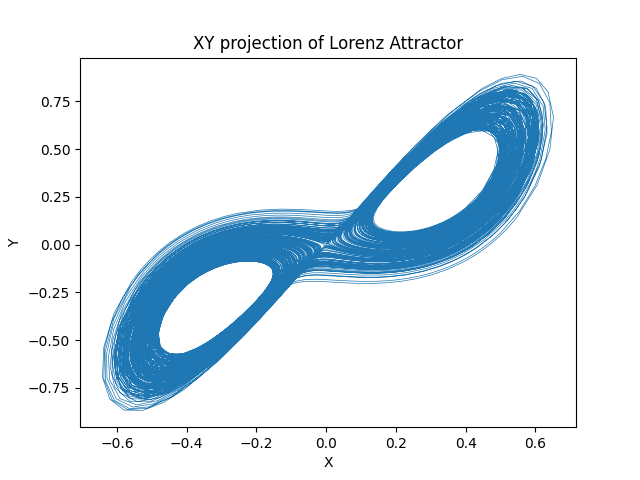

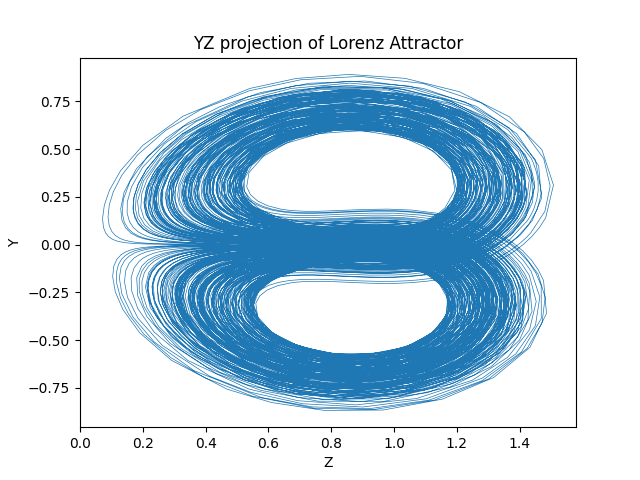

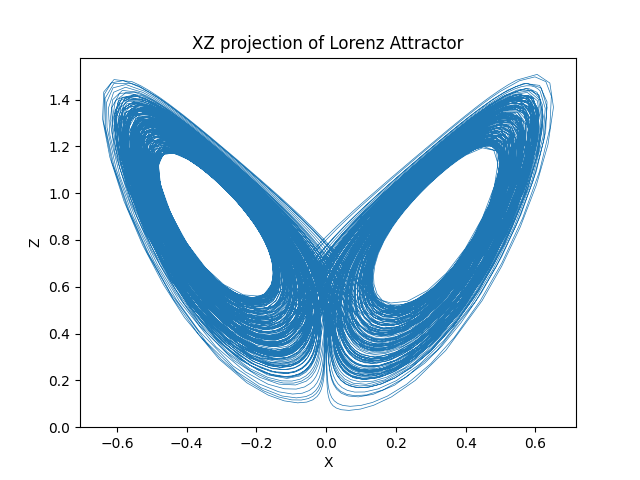

In [9]:
# Plot XY, YZ, XZ projections of the attractor as 3 different plots and save them 

save = True

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, Y, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('XY projection of Lorenz Attractor')
if save:plt.savefig(figpath+'\Lor_sim_XY.png')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Z, Y, lw=0.5)
ax.set_xlabel('Z')
ax.set_ylabel('Y')
ax.set_title('YZ projection of Lorenz Attractor')
if save: plt.savefig(figpath+'\Lor_sim_YZ.png')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, Z, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_title('XZ projection of Lorenz Attractor')
if save: plt.savefig(figpath+'\Lor_sim_XZ.png')
plt.show()


### Bifurcation Diagram

In [28]:
def solve_for_R(R):
    R8 = R
    sol = LSODA(equations,  t_0, state_0, t_f, vectorized=True)
    X = [sol.y[0]]
    Y = [sol.y[1]]
    Z = [sol.y[2]]
    t = [sol.t]
    while sol.status != 'finished':
        sol.step()
        t.append(sol.t)
        X.append(sol.y[0])
        Y.append(sol.y[1])
        Z.append(sol.y[2])
    return t, X, Y, Z

In [29]:
# defint the range of changing R
R_range = np.linspace(0.1e3, 10e3, 50)

# initialize the bifurcation array
X2_max = []
Y2_max = []
Z2_max = []
R5_X2_max = []
R5_Y2_max = []
R5_Z2_max = []

X2_min = []
Y2_min = []
Z2_min = []
R5_X2_min = []
R5_Y2_min = []
R5_Z2_min = []

for R in tqdm(R_range):
    t_, X_, Y_, Z_ = solve_for_R(R)

    for i in range(1,len(t_)-1):

        if ((X_[i] >= X_[i-1]) and (X_[i] >= X_[i+1])) and not ((X_[i] == X_[i-1]) and (X_[i] == X_[i+1])):
            X2_max.append(X_[i])
            R5_X2_max.append(R)
        if ((X_[i] <= X_[i-1]) and (X_[i] <= X_[i+1])) and not ((X_[i] == X_[i-1]) and (X_[i] == X_[i+1])):
            X2_min.append(X_[i])
            R5_X2_min.append(R)
            
        if ((Y_[i] >= Y_[i-1]) and (Y_[i] >= Y_[i+1])) and not ((Y_[i] == Y_[i-1]) and (Y_[i] == Y_[i+1])):
            Y2_max.append(Y_[i])
            R5_Y2_max.append(R)
        if ((Y_[i] <= Y_[i-1]) and (Y_[i] <= Y_[i+1])) and not ((Y_[i] == Y_[i-1]) and (Y_[i] == Y_[i+1])):
            Y2_min.append(Y_[i])
            R5_Y2_min.append(R)
            
        if ((Z_[i] >= Z_[i-1]) and (Z_[i] >= Z_[i+1])) and not ((Z_[i] == Z_[i-1]) and (Z_[i] == Z_[i+1])):
            Z2_max.append(Z_[i])
            R5_Z2_max.append(R)
        if ((Z_[i] <= Z_[i-1]) and (Z_[i] <= Z_[i+1])) and not ((Z_[i] == Z_[i-1]) and (Z_[i] == Z_[i+1])):
            Z2_min.append(Z_[i])
            R5_Z2_min.append(R)

100%|██████████| 50/50 [00:37<00:00,  1.35it/s]


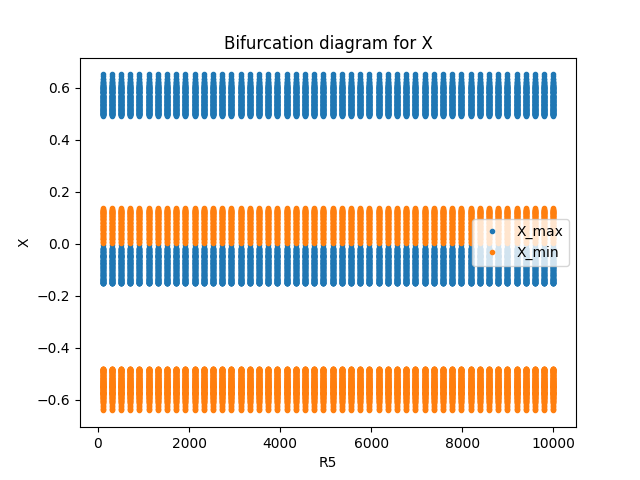

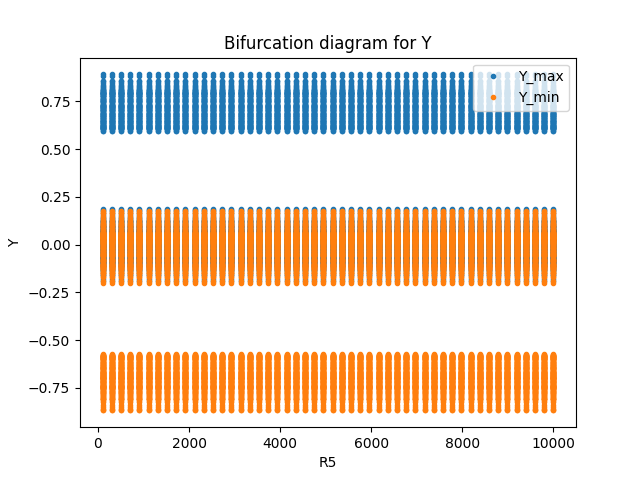

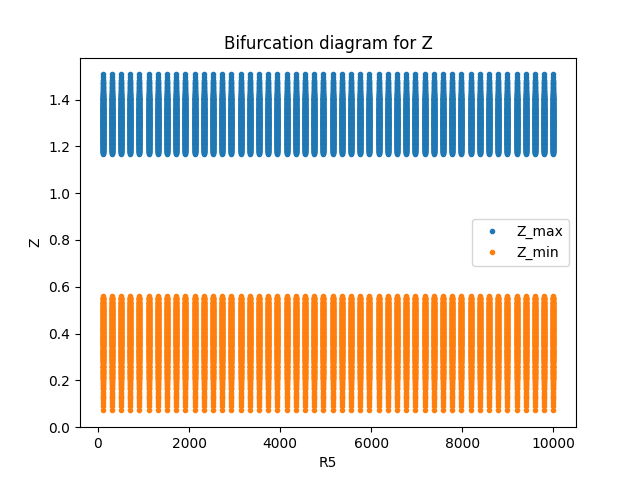

In [31]:
# Plot the bifurcation diagram

save = False

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(R5_X2_max, X2_max, 'o', label='X_max', markersize = 3)
ax.plot(R5_X2_min, X2_min, 'o', label='X_min', markersize = 3)
plt.xlabel('R5')
plt.ylabel('X')
plt.title('Bifurcation diagram for X')
plt.legend()
if save: plt.savefig(figpath+'\Lor_sim_bifurcation_X.png')
else: plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(R5_Y2_max, Y2_max, 'o', label='Y_max', markersize = 3)
ax.plot(R5_Y2_min, Y2_min, 'o', label='Y_min', markersize = 3)
plt.xlabel('R5')
plt.ylabel('Y')
plt.title('Bifurcation diagram for Y')
plt.legend()
if save: plt.savefig(figpath+'\Lor_sim_bifurcation_Y.png')
else: plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(R5_Z2_max, Z2_max, 'o', label='Z_max', markersize = 3)
ax.plot(R5_Z2_min, Z2_min, 'o', label='Z_min', markersize = 3)
plt.xlabel('R5')
plt.ylabel('Z')
plt.title('Bifurcation diagram for Z')
plt.legend()
if save: plt.savefig(figpath+'\Lor_sim_bifurcation_Z.png')
else: plt.show()

#### <font color=red> Outputs</font>

$$ \dot{x} = \alpha (y - x) $$
$$ \dot{y} = x (\rho - z) - y $$
$$ \dot{z} = x y - \beta z $$
$$X = x / 10;\quad Y = y / 10;\quad Z = z / 30$$

$$
\frac{{dX}}{{dt}} = \frac{{- X - \left(\frac{{R_4}}{{R_1}}  X\right) + \left(\frac{{R_4}}{{R_2}}  X\right) + \left(\frac{{R_4}}{{R_3}}  Y\right)}}{{C_1  R_5}}
$$

$$
\frac{{dY}}{{dt}} = \frac{{- Y - \left(\frac{{R_{10}}}{{R_7}}  X  Z\right) + \left(\frac{{R_{10}}}{{R_8}}  X\right)}}{{C_2  R_{11}}}
$$

$$
\frac{{dZ}}{{dt}} = \frac{{- Z - \left(\frac{{R_{16}}}{{R_{13}}}  Z\right) + \left(\frac{{R_{16}}}{{R_{14}}}  X  Y\right)}}{{C_3  R_{17}}}
$$

$$\kappa = 5000$$

Parameters:
$$ R_1 = 10k\Omega, R_2 = 100k\Omega, R_3 = 10k\Omega, R_4 = 100k\Omega, R_5 = 1k\Omega, R_6 = 5.6k\Omega, R_7 = 3.3k\Omega$$
$$ R_8 = 3.6\Omega, R_{9} = 3.19k\Omega, R_{10} = 100k\Omega, R_{11} = 1k\Omega, R_{12} = 3.3k\Omega, R_{14} = 37.5k\Omega$$
$$ R_{14} = 3.3k\Omega,R_{15} = 3.74k\Omega, R_{16} = 100k\Omega, R_{17} = 1k\Omega, R_{18} = 1k\Omega, R_{19} = 9k\Omega$$
$$ C_1 = 200nF , C_2 = 200nF , C_3 = 200nF $$

![Lorenz circuit](../figures/lorenz_circuit.png)